<a href="https://colab.research.google.com/github/Vaishnavi-surisetti/codsoft_tasks/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#setting the research goalPROJECT CHARTER :
title : brain stroke prediction
objective: Develop a predictive model to assess an individual’s risk of stroke based on health parameters.
data required:

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")


#displaying data :

In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


data preparation:
It involves 3 steps
 1.data cleansing:handling missing values

In [3]:
print("Missing values before handling:\n", df['bmi'].isnull().sum())

# Divide glucose levels into 5 categories (bins)
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=5)

# Fill missing BMI values with the average BMI of their respective glucose category
for category in df['glucose_category'].unique():
    avg_bmi = df[df['glucose_category'] == category]['bmi'].mean()
    df.loc[(df['glucose_category'] == category) & (df['bmi'].isnull()), 'bmi'] = avg_bmi

# Drop the temporary glucose_category column
df.drop(columns=['glucose_category'], inplace=True)


Missing values before handling:
 201


#check whether the missing values are handled or not :

In [4]:
print("Missing values after handling:\n", df['bmi'].isnull().sum())

Missing values after handling:
 0


#save the cleaned dataset :

In [5]:
df.to_csv("processed_stroke_data.csv", index=False)
print("\n✅ Missing values handled and data saved!")


✅ Missing values handled and data saved!


In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,33.864042,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# data tranformatin :
Handle Categorical Variables (Convert to Numeric)

In [8]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

data after converting into numeric :

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0.0,61.0,0,0,1,Self-employed,0,202.21,33.864042,never smoked,1
2,31112,1.0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0.0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0.0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


smoking status values are coverted into numerical by using one hot coding because it is no possible to indicate with only 1 and 0

In [17]:
# Convert 'smoking_status' to numerical using One-Hot Encoding
#df = pd.get_dummies(df, columns=['smoking_status', 'work_type'], drop_first=True)if 'smoking_status' in df.columns and 'work_type' in df.columns:
if 'smoking_status' in df.columns and 'work_type' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_status', 'work_type'], drop_first=True)
else:
    print("Columns already encoded! No need to apply get_dummies().")


Columns already encoded! No need to apply get_dummies().


In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1.0,67.0,0,1,1,1,228.69,36.600000,1,True,False,False,False,True,False,False
1,51676,0.0,61.0,0,0,1,0,202.21,33.864042,1,False,True,False,False,False,True,False
2,31112,1.0,80.0,0,1,1,0,105.92,32.500000,1,False,True,False,False,True,False,False
3,60182,0.0,49.0,0,0,1,1,171.23,34.400000,1,False,False,True,False,True,False,False
4,1665,0.0,79.0,1,0,1,0,174.12,24.000000,1,False,True,False,False,False,True,False


 Normalize Numerical Features (Scale values for ML models)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# 4️⃣ Check if missing values are handled


In [21]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64


prepared data is saved to processed_stroke_data.csv

In [25]:
df = pd.get_dummies(df, columns=['ever_married', 'Residence_type'], drop_first=True)
df.to_csv("processed_stroke_data.csv", index=False)
print("\n✅ Missing values handled and data saved!")


✅ Missing values handled and data saved!


Next Steps After Data Preprocessing
#Exploratory Data Analysis (EDA)

Understand patterns in the dataset before applying ML models.
Generate graphs and statistics:

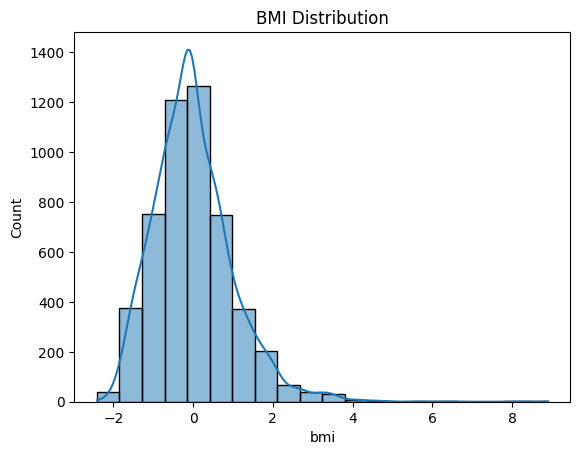

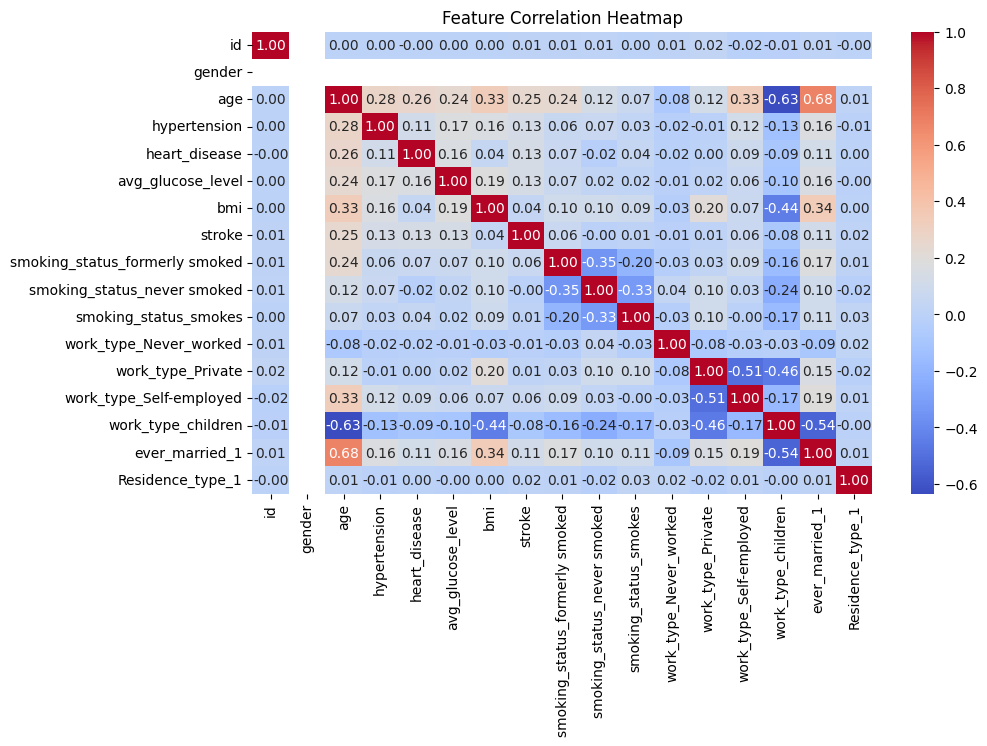

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of BMI
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title("BMI Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#Feature Engineering & Encoding

Convert categorical variables into numeric (if not already done).
Scale numerical features:



In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


Model Selection & Training

Split the data into training and testing sets:

Train different models (Logistic Regression, Random Forest, etc.):

In [40]:
X = df.drop(columns=['stroke', 'id'])  # Features
y = df['stroke']  # Target variable

In [41]:
# 🔹 Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from imblearn.over_sampling import SMOTE
X_train = X_train.fillna(X_train.mean())  # Replace NaN with column mean
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# ✅ Handle missing values before SMOTE
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# ✅ Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [38]:
# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = model.predict(X_test)

# Display results
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9266144814090019
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.18      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.57      0.55      0.56      1022
weighted avg       0.92      0.93      0.92      1022

